# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**План работ:**

1. Изучить датасет (первые строки, метод `info()`, гистограммы и т.д.).
2. Определить пропущенные значения и заполнить их там, где это возможно.
3. Изменить типы данных там, где это необходимо.
4. Устранить неявные дубликаты в названиях населённых пунктов.
5. Устранить редкие и выбивающиеся значения (аномалии) во всех столбцах.
6. Посчитать и добавить в таблицу следующие параметры:
    - цена одного квадратного метра;
    - день публикации объявления (0 - понедельник, 1 - вторник и т.д.);
    - месяц публикации объявления;
    - год публикации объявления;
    - тип этажа квартиры (значения — «первый», «последний», «другой»);
    - расстояние в км до центра города.
7. Изучить, описать и построить гистограммы для следующих параметров:
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - этаж квартиры;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего аэропорта;
    - расстояние до ближайшего парка;
    - день и месяц публикации объявления.
8. Исследовать количества дней для продажи квартиры.
9. Исследовать факторы, влияющие на полную стоимость квартиры:
    - общей площади;
    - жилой площади;
    - площади кухни;
    - количество комнат;
    - типа этажа, на котором расположена квартира (первый, последний, другой);
    - даты размещения (день недели, месяц, год);
10. Провести анализ десяти населённых пунктов с наибольшим числом объявлений и анализ средней стоимости квадратного метра в них.
11. Провести анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра

## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


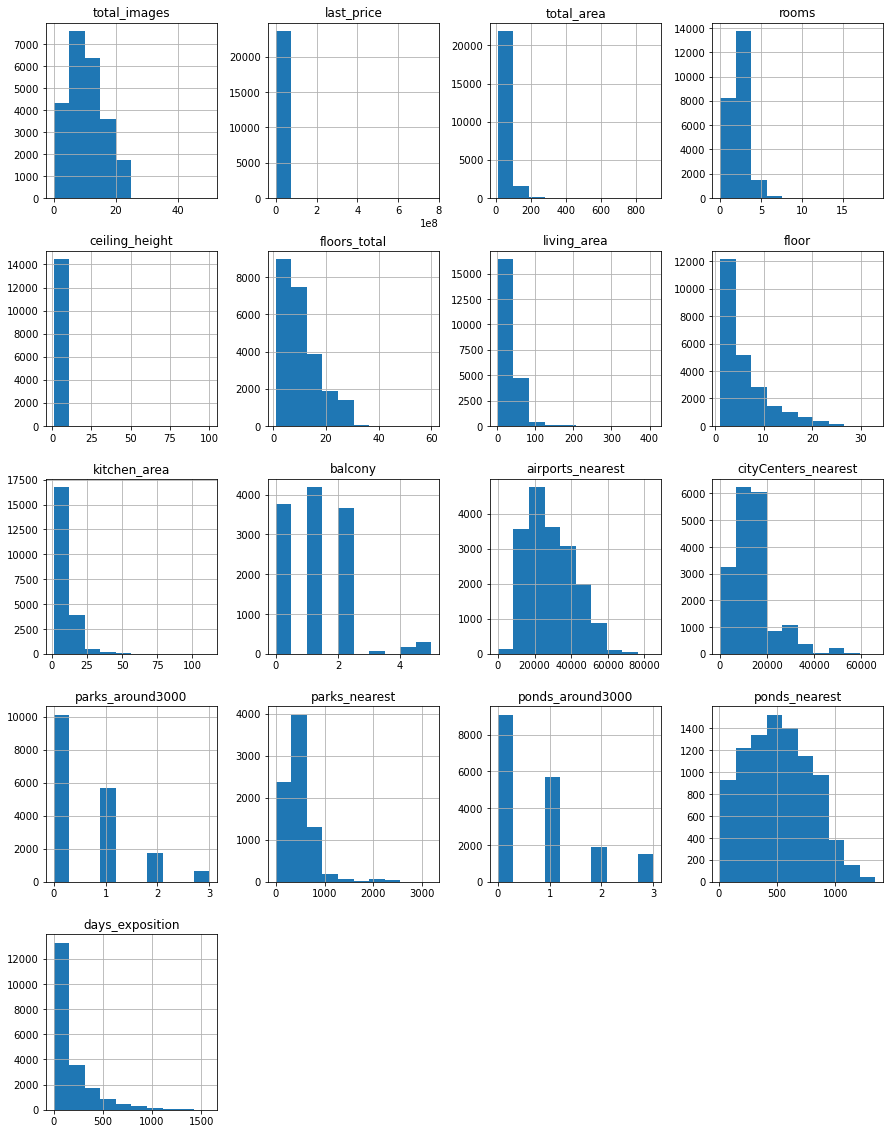

In [5]:
data.hist(figsize=(15, 20))  # гистограммы всех столбцов с числовыми значениями
plt.show()

## Предобработка данных

### Работа с пропущенными значениями. Заполнение категориальных и "очевидных" значений.

Начнем с категориальных значений, на которые не могут влиять аномалии в этом же столбце, а также с "очевидных" пропусков, причину появления которых можно понять и подставить соответсвующее значение. 

In [6]:
data.isna().sum()  # выведем количество пропусков в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# пропущенные значения

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропущенные значения' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

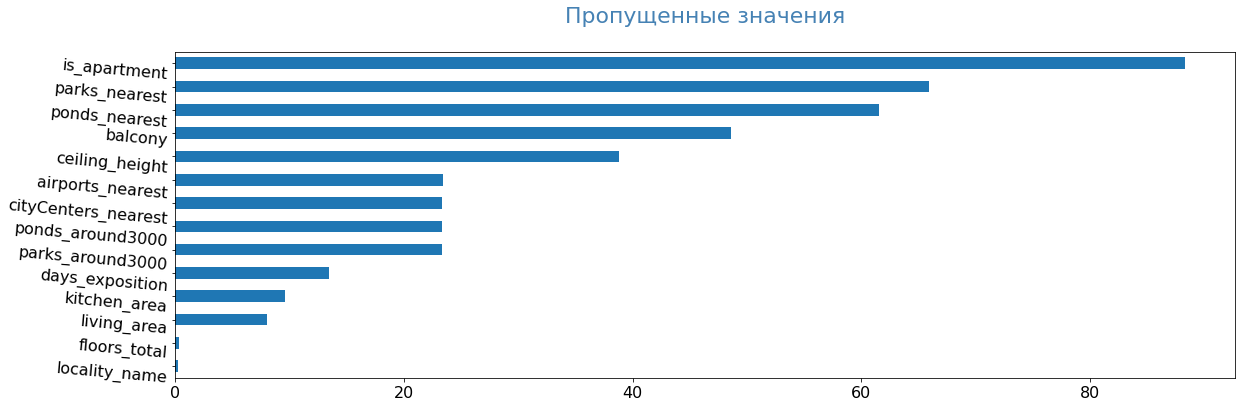

In [8]:
pass_value_barh(data)

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data = data.dropna(subset=['floors_total']).reset_index(drop=True)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [10]:
data.isna().sum()  # проверим, что все пропуски удалены

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [11]:
data.info()  # проверим корректность индексов и измения в типах данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

**Были заполнены пропуски в следующих столбцах:**

* `'is_apartment'`. Данный столбец содержит 2 типа значений: True - является апартаментами, и False - не является, соответственно. Пропуски, скорее всего, указывают на то, что жилье не является апартаментами, но продавец просто явно не указал на это. Заменим такие пропуски на False. Тип данных столбца должен измениться на bool. 
* `'balcony'`. Данный столбец содержит число балконов в квартире. Если продавец его не указал, значит, скорее всего, в его жилье нет балконов. Заменим такие пропуски на 0.
* `'locality_name'`. Данный столбец отражает данные о название населенного пункта. Причиной появления таких пропусков могла стать любая техническая ошибка при выгрузке или копирование данных. Кроме того продавец мог просто случайно не указать адрес, если форма не предусматривает проверку заполнения обязательных полей. Однако пропуски в данном столбце составляют очень маленькую долю от всех записей в таблице (примерно 0,2%). Удалим строки содержащие такие пропуски, так как эта небольшая потеря не исказит данные, но работать с ними станет проще, поскольку информация о населенном пункте необходима для анализа.
* `'floors_total'`. Данный столбец отражает данные о числе этажей в доме. Причиной появления таких пропусков могло стать то, что продавец просто не указал этажность здания. Однако пропуски в данном столбце составляют очень маленькую долю от всех записей в таблице (примерно 0,4%). Удалим строки содержащие такие пропуски, так как эта небольшая потеря не исказит данные, но работать с ними станет проще, поскольку информация об этажности дома необходима для анализа.
* `'parks_around3000'` и `'ponds_around3000'`. Данные столбцы содержат данные о числе парков и водоемов в радиусе 3 км от квартиры. Если продавец его не указал, значит, скорее всего, в этом радиусе нет парков или водоемов. Заменим такие пропуски на 0.

### Изменение типов данных

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [13]:
data.head(10)  # проверим корректность отображения данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


In [14]:
data.info()  # проверим, что типы данных изменены

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

**Были изменены типы данных в следующих столбцах:**

* `'first_day_exposition'`. Данный столбец содержит дату публикации объявления, которая записана просто строкой. Изменим тип данных с object на datetime, чтобы в последствии можно было обрабатывать эти данные как дату: получать день недели, вычислять количество дней и т.п.
* `'floors_total'`, `'balcony'`, `'parks_around3000'`, `'ponds_around3000'`. Все эти столбцы содержат информацию о количестве чего-то: этажей, балконов, парков или водоемов. Количество отражают целые числа, поэтому изменим тип данных с float на int.

### Устранение неявных дубликатов

Среди значений столбца `'locality_name'` есть неявные дубликаты. Например, "поселок Рябово", "поселок городского типа Рябово" и "посёлок городского типа Рябово" - это все названия одного и того же населенного пункта. Удалим такие неявные дубликата, заменив все названия на однотипные.

In [15]:
sorted(data['locality_name'].unique())  # выводим уникальные значения столбца с названиями насел-х пунктов

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [16]:
def locality_change(row):
    row = row.replace('ё', 'е')
    if 'поселок при железнодорожной станции' in row:
        return row.replace('поселок при железнодорожной станции', 'поселок станции')
    elif 'городской поселок' in row:
        return row.replace('городской поселок', 'поселок')
    elif 'поселок городского типа' in row:
        return row.replace('поселок городского типа', 'поселок')
    elif 'коттеджный поселок' in row:
        return row.replace('коттеджный поселок', 'поселок')
    else:
        return row

In [17]:
data['locality_name'] = data['locality_name'].apply(locality_change)  # заменяем неявные дубликаты

In [18]:
sorted(data['locality_name'].unique())  # проверяем, что замена прошла успешно

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

In [19]:
# check
data['locality_name'].nunique()

319

### Устранение редких и выбивающихся значений

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

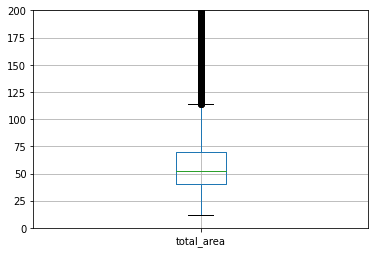

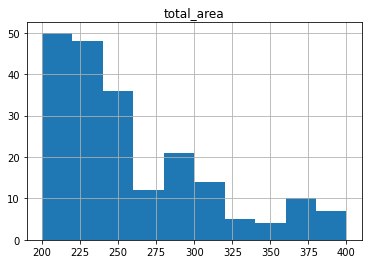

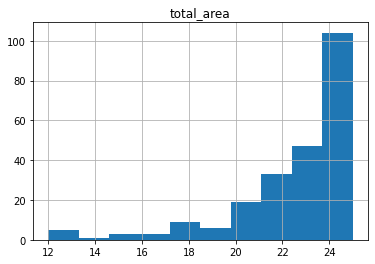

226

27

In [21]:
display(data['total_area'].describe())  # выведем данные по столбцу с общей площадью квартиры в квадратных метрах
data.boxplot(column='total_area')
plt.ylim(0, 200)             
plt.show()
data.hist(column='total_area', range=(200, 400)) 
plt.show()
data.hist(column='total_area', range=(12, 25)) 
plt.show()
display(len(data.query('total_area > 200')))
display(len(data.query('total_area < 20')))

In [22]:
data = data.query('20 <= total_area <= 200').reset_index(drop=True)

In [23]:
data['total_area'].describe()  # проверяем, как удаление части данных повлияло на основные характеристики

count    23312.000000
mean        58.199064
std         26.490018
min         20.000000
25%         40.000000
50%         51.900000
75%         68.885000
max        200.000000
Name: total_area, dtype: float64

Согласно числовому описанию данных максимальное значение площади равно 900 кв.м., а минимальное - 12 кв.м.. Эти значения слишком большие и маленькие, а потому не похожи на реальные. На диаграмме размаха мы видим, что значения, выходящие за пределы "усов" и считающиеся выбросами, начинаются уже примерно со 115 кв.м. вверх и с 35 кв.м. вниз. Посмотрим также на гистограмму значений, начинающуюся с 200 кв.м.. На ней видно, что после 200 кв.м. значений в каждой "корзине" все меньше, а после 250 кв.м. уже не превышают 20. Примерно то же самое можно наблюдать на гистограмме значений до 25 кв.м.. Поэтому **убираем из выборки все строки, где общая площадь квартиры превышает 200 кв.м. или меньше 20 кв.м.**. Это не слишком повлияет на размер выборки, при этом она гарантированно не будет содержать выбросы.

count    14320.000000
mean         2.764506
std          1.266087
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

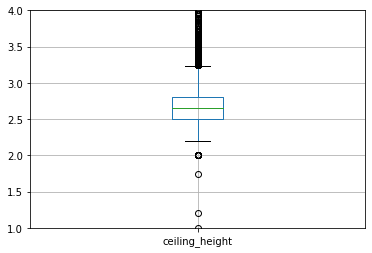

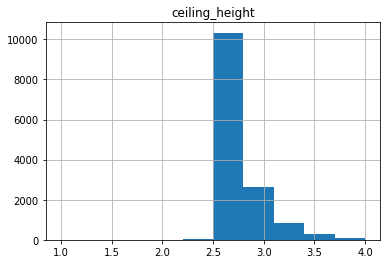

In [24]:
display(data['ceiling_height'].describe())  # выведем данные по столбцу с высотой потолков в метрах
data.boxplot(column='ceiling_height')  
plt.ylim(1, 4)             
plt.show()
data.hist(column='ceiling_height', range=(1, 4)) 
plt.show()

In [25]:
def normal_height(num):
    if num > 10:
        return num / 10
    else:
        return num

In [26]:
data['ceiling_height'] = data['ceiling_height'].apply(normal_height)
data = data.loc[(data['ceiling_height'] >= 2.4) | (data['ceiling_height'].isna())]

count    14295.000000
mean         2.721905
std          0.285570
min          2.400000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

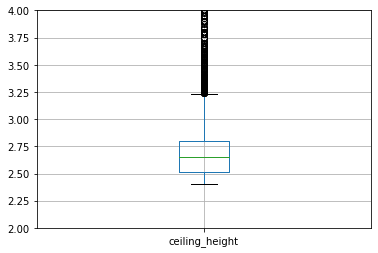

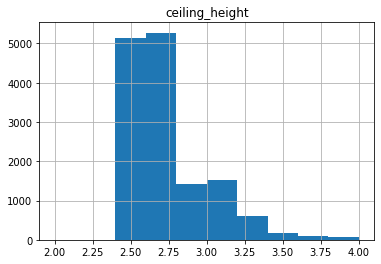

In [27]:
display(data['ceiling_height'].describe())  # проверяем, как удаление части данных повлияло на основные характеристики
data.boxplot(column='ceiling_height')  # и графики
plt.ylim(2, 4)             
plt.show()
data.hist(column='ceiling_height', range=(2, 4)) 
plt.show()

Согласно числовому описанию данных максимальное значение высоты потолка равно 100 м., а минимальное - 1 м.. Эти значения слишком большие и маленькие, а потому не похожи на реальные. Скорее всего при записи данных произошла какая-то ошибка. В описании мы видим, что медианное значение равно 2.65 м. На диаграмме размаха видно, что значения, выходящие за пределы "усов" и считающиеся выбросами, начинаются уже примерно с 3.2 м. вверх и с 2.2 м. вниз. Посмотрим также на гистограмму значений с 1 м. до 4 м. На ней видно, что больше всего квартир с высотой потолков от 2.5 м. до 3 м., что вполне отражает современные стандарты жилых помещений. Минимальная высота потолка в жилом помещении по нормам 2.4. м. Максимальное значений высоты потолка в квартире, которое можно реально представить, - это 10 м. С такой высотой бывают многоуровневые квартиры с двойным светом. Поэтому **разделим все значения выборки больше 10 м. на 10, устранив таким образам вероятные ошибки, а также уберем из выборки все квартиры, где высота потолка меньше 2.4 м.**.

count    23287.000000
mean         2.036243
std          0.995123
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

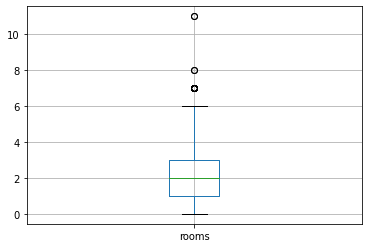

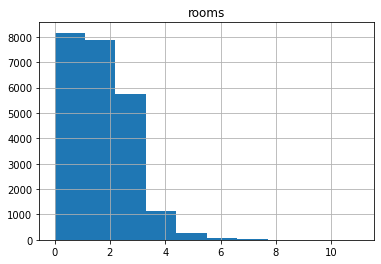

185

24

In [28]:
display(data['rooms'].describe())  # выведем данные по столбцу с количеством комнат
data.boxplot(column='rooms')            
plt.show()
data.hist(column='rooms') 
plt.show()
display(len(data.query('rooms == 0')))
display(len(data.query('rooms > 6')))

In [29]:
data = data.query('0 < rooms <= 6').reset_index(drop=True)

count    23078.000000
mean         2.046971
std          0.966687
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

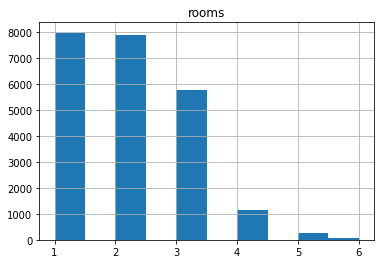

In [30]:
display(data['rooms'].describe())  # проверяем, как удаление части данных повлияло на основные характеристики
data.hist(column='rooms') 
plt.show()

Согласно числовому описанию данных максимальное количество комнат равно 11, а минимальное - 0. Значение 0 явно аномальное, так как не может быть квартир без комнат. На диаграмме размаха видно, что значения, выходящие за пределы "усов" и считающиеся выбросами, начинаются с 6 комнат, что вполне отражает действительность. Поэтому **уберем из выборки все квартиры, где количество комнат превышает 6 или равно 0**. Это не слишком повлияет на размер выборки, при этом она гарантированно не будет содержать выбросы.

count    21098.000000
mean        10.376352
std          5.362669
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max         93.200000
Name: kitchen_area, dtype: float64

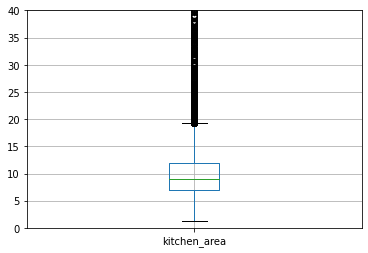

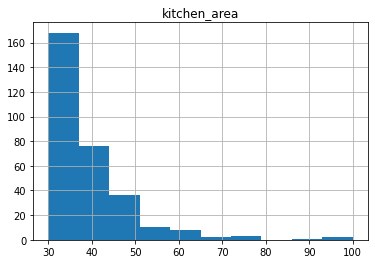

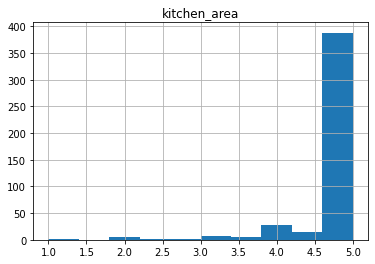

253

98

In [31]:
display(data['kitchen_area'].describe())  # выведем данные по столбцу с площадью кухни в квадратных метрах
data.boxplot(column='kitchen_area')
plt.ylim(0, 40) 
plt.show()
data.hist(column='kitchen_area', range=(30, 100)) 
plt.show()
data.hist(column='kitchen_area', range=(1, 5)) 
plt.show()
display(len(data.query('kitchen_area > 30')))
display(len(data.query('kitchen_area < 5')))

In [32]:
data = data.loc[(data['kitchen_area'] <= 30) & (data['kitchen_area'] >= 5) | (data['kitchen_area'].isna())].reset_index(drop=True)

In [33]:
data['kitchen_area'].describe()  # проверяем, как удаление части данных повлияло на основные характеристики

count    20747.000000
mean        10.038223
std          4.074150
min          5.000000
25%          7.000000
50%          9.000000
75%         11.700000
max         30.000000
Name: kitchen_area, dtype: float64

Согласно числовому описанию данных максимальное значение площади кухни равно 93 кв.м., а минимальное - 1 кв.м.. Эти значение слишком большие и маленькие для 1 комнаты, а потому не похожи на реальные. В описании мы видим, что медианное значение равно 9 кв.м. На диаграмме размаха видно, что значения, выходящие за пределы "усов" и считающиеся выбросами, начинаются уже примерно с 20 кв.м. вверх и 2 кв.м. вниз. Посмотрим также на гистограмму значений, начинающуюся с 30 кв.м.. На ней видно, что после 30 кв.м. значений в каждой "корзине" значительно меньше. Кухня не является жилым помещение, по этому её площадь обычно составляет до 20 кв. м.. Посмотрим также на гистограмму значений до 5 кв. м.. На ней видно, что кухонь меньше 5 кв.м. совсем мало.  Поэтому **убираем из выборки все строки, где общая площадь квартиры превышает 30 кв.м. или меньше 5 кв.м.**, предполагая, что возможно есть какой-то небольшой процент квартир с аномально большими кухнями. Это не слишком повлияет на размер выборки, при этом она гарантированно не будет содержать выбросы. 

count    20927.000000
mean        33.127926
std         17.019008
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

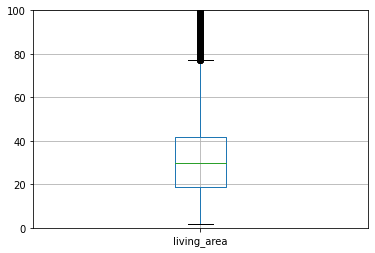

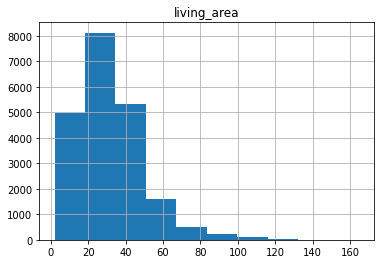

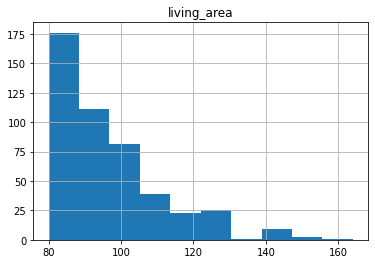

In [34]:
display(data['living_area'].describe())  # выведем данные по столбцу с жилой площадью квартиры в квадратных метрах
data.boxplot(column='living_area')            
plt.ylim(0, 100) 
plt.show()
data.hist(column='living_area') 
plt.show()
data.hist(column='living_area', range=(80, 164)) 
plt.show()

In [35]:
data = data.loc[(data['living_area'] <= 120) & (data['living_area'] >= 14) | (data['living_area'].isna())].reset_index(drop=True)

In [36]:
data['living_area'].describe()  # проверяем, как удаление части данных повлияло на основные характеристики

count    20597.000000
mean        33.229761
std         16.377667
min         14.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        120.000000
Name: living_area, dtype: float64

Согласно числовому описанию данных максимальное значение жилой площади равно 164 кв.м., а минимальное - 2 кв.м.. Максимальная жилая площадь, которую мы оставили в выборке - 200 кв.м., поэтому жилая площадь в 164 кв.м. - это слишком большое знаяение. Аналогично можно отнести 2 кв.м. к аномалиям, так как минимальная площадь жилой комнаты должна составлять 6 кв.м., а общей жилой комнаты в однокомнатной квартире 14 кв.м. На диаграмме размаха мы видим, что значения, выходящие за пределы "усов" и считающиеся выбросами, начинаются уже примерно с 80 кв.м.. Посмотрим также на гистограмму значений, начинающуюся с 80 кв.м.. На ней видно, что после 100 кв.м. значений в каждой "корзине" значительно меньше. Поэтому **убираем из выборки все строки, где жилая площадь квартиры превышает 120 кв.м. или меньше 14 кв.м.**. Это не слишком повлияет на размер выборки, при этом она гарантированно не будет содержать выбросы.

count    2.239700e+04
mean     5.845764e+06
std      4.989654e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.600000e+06
75%      6.600000e+06
max      1.240000e+08
Name: last_price, dtype: float64

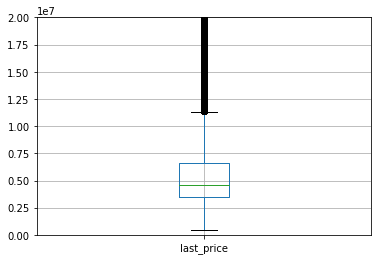

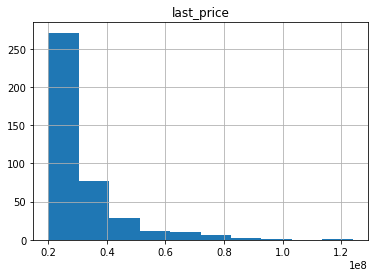

396

In [37]:
display(data['last_price'].describe())  # выведем данные по столбцу с ценой квартиры
data.boxplot(column='last_price')
plt.ylim(0, 20000000)  
plt.show()
data.hist(column='last_price', range=(20000000, 124000000)) 
plt.show()
display(len(data.query('last_price > 20000000')))

In [38]:
data = data.query('last_price <= 20000000').reset_index(drop=True)

count    2.200100e+04
mean     5.379201e+06
std      3.088001e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.594000e+06
75%      6.500000e+06
max      2.000000e+07
Name: last_price, dtype: float64

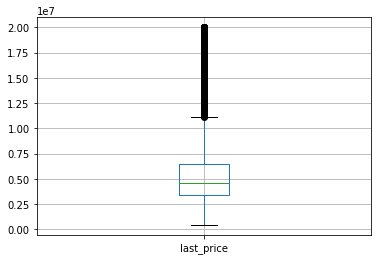

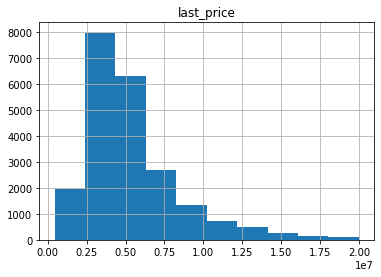

In [39]:
display(data['last_price'].describe())  # проверяем, как удаление части данных повлияло на основные характеристики
data.boxplot(column='last_price')  
plt.show()
data.hist(column='last_price') 
plt.show()

Согласно числовому описанию данных максимальная цена за квартиру составляет 124 млн., а минимальная - 430 тыс.. На диаграмме размаха мы видим, что значения, выходящие за пределы "усов" и считающиеся выбросами, начинаются уже примерно с 11 млн.. Посмотрим также на гистограмму значений, начинающуюся с 20 млн.. На ней видно, что после 20 млн. значений в каждой "корзине" значительно меньше. Поэтому **убираем из выборки все строки, где жилая площадь квартиры превышает 20 млн.**. Это не слишком повлияет на размер выборки, при этом она гарантированно не будет содержать выбросы.

count    22001.000000
mean        10.684287
std          6.578502
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

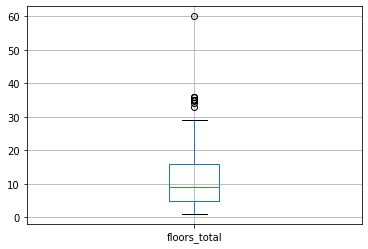

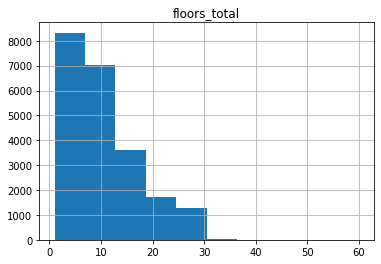

In [40]:
display(data['floors_total'].describe())  # выведем данные по столбцу с количеством этажей
data.boxplot(column='floors_total') 
plt.show()
data.hist(column='floors_total') 
plt.show()

In [41]:
data = data.query('floors_total <= 37').reset_index(drop=True)

In [42]:
display(data['floors_total'].describe())  # проверяем, как удаление части данных повлияло на основные характеристики

count    22000.000000
mean        10.682045
std          6.570243
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

Согласно числовому описанию данных максимальное количество этажей в доме среди предствленных равно 60. На диаграмме размаха мы видим, что значения, выходящие за пределы "усов" и считающиеся выбросами, начинаются уже примерно с 30 этажа. Самое высокое жилое здание в Петербурге имеет 37 этажей. Поэтому **убираем из выборки все строки, где количество этажей превышает 37**. Это не слишком повлияет на размер выборки, при этом она гарантированно не будет содержать выбросы.

count    19145.000000
mean       177.776965
std        215.971282
min          1.000000
25%         45.000000
50%         94.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64

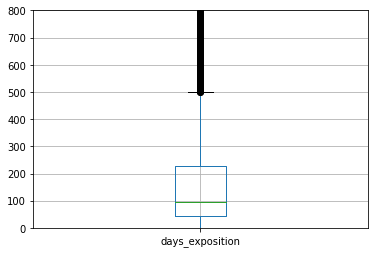

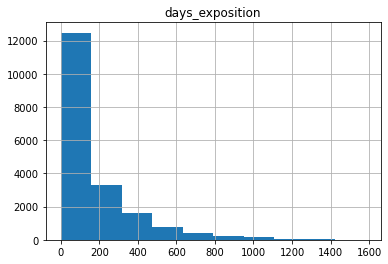

1076

In [43]:
display(data['days_exposition'].describe())  # выведем данные по столбцу с количеством этажей
data.boxplot(column='days_exposition') 
plt.ylim(0, 800)
plt.show()
data.hist(column='days_exposition') 
plt.show()
display(len(data.query('days_exposition > 600')))

In [44]:
data = data.loc[(data['days_exposition'] <= 600) | (data['days_exposition'].isna())].reset_index(drop=True)

In [45]:
display(data['days_exposition'].describe())

count    18069.000000
mean       137.812386
std        136.007781
min          1.000000
25%         42.000000
50%         87.000000
75%        192.000000
max        600.000000
Name: days_exposition, dtype: float64

Согласно числовому описанию данных максимальное количество дней, которое объявление "висело" в продаже, равно 1580 дней. Это крайне большон значение и вряд ли возможно в реальности. На диаграмме размаха мы видим, что значения, выходящие за пределы "усов" и считающиеся выбросами, начинаются уже примерно с 500 дней. Кроме того видно, что медиана сильно тяготи к 1 квартилю. Поэтому **убираем из выборки все строки, где количество дней превышает 600**, чтобы не сильно уменьшать ее объем.

In [46]:
data.info()  # проверим корректность индексов и то, что лишние данные не удалены

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20924 entries, 0 to 20923
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20924 non-null  int64         
 1   last_price            20924 non-null  float64       
 2   total_area            20924 non-null  float64       
 3   first_day_exposition  20924 non-null  datetime64[ns]
 4   rooms                 20924 non-null  int64         
 5   ceiling_height        12816 non-null  float64       
 6   floors_total          20924 non-null  int64         
 7   living_area           19244 non-null  float64       
 8   floor                 20924 non-null  int64         
 9   is_apartment          20924 non-null  bool          
 10  studio                20924 non-null  bool          
 11  open_plan             20924 non-null  bool          
 12  kitchen_area          19088 non-null  float64       
 13  balcony         

In [47]:
# check
# Показатели кол-ва объявлений в датасете, минимальных и максимальных значений в выбранных параметрах

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"20,924.00","20,924.00","12,816.00","18,069.00","20,924.00","19,244.00","19,088.00","20,924.00","20,924.00"
min,1.00,20.00,2.40,1.00,"430,000.00",14.00,5.00,1.00,1.00
max,6.00,200.00,10.00,600.00,"20,000,000.00",120.00,30.00,33.00,36.00


In [48]:
# check
# сырые данные

try:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t') 
except:
    df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
    

In [49]:
# check
# Значения параметров объектов недвижимости на разных квантилях

(
    df_check[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .95, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,25.20,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.95,4.00,116.00,3.30,647.00,"15,300,000.00",69.00,20.00,16.00,25.00
0.9976,7.00,309.74,5.22,"1,311.28","82,000,000.00",181.25,50.00,25.00,27.00


### Работа с пропущенными значениями. Заполнение количественных пропусков усредненными значениями.

In [50]:
data.isna().sum()  # выведем количество пропусков в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8108
floors_total                0
living_area              1680
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1836
balcony                     0
locality_name               0
airports_nearest         5040
cityCenters_nearest      5023
parks_around3000            0
parks_nearest           14072
ponds_around3000            0
ponds_nearest           13229
days_exposition          2855
dtype: int64

In [51]:
# выведем количество аномалий до заполнения синтетическими данными
row_anomaly = data[(data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area']))]
row_anomaly['total_area'].count()

384

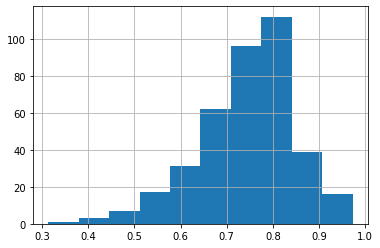

In [52]:
# выведем долю жилой площади от общей для аномальных значений
row_anomaly['living_area'].div(row_anomaly['total_area'], axis=0).hist()
plt.show()

In [53]:
data.loc[(data['ceiling_height'].isna()), 'ceiling_height'] = data['ceiling_height'].median()
data.loc[(data['kitchen_area'].isna()), 'kitchen_area'] = data['kitchen_area'].median()

In [54]:
# выведем количество аномалий после заполнения площади кухни синтетическими данными 
(data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])).sum()

560

In [55]:
for num in data['rooms'].unique():
    procent = data.loc[(data['rooms'] == num), 'living_area'] / data.loc[(data['rooms'] == num), 'total_area']
    median_procent = procent.median()
    data.loc[(data['rooms'] == num) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == num) & (data['living_area'].isna()), 'total_area'].mul(median_procent)

In [56]:
# выведем количество аномалий после заполнения жилой площади площади синтетическими данными 
(data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])).sum()

583

In [57]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5040
cityCenters_nearest      5023
parks_around3000            0
parks_nearest           14072
ponds_around3000            0
ponds_nearest           13229
days_exposition          2855
dtype: int64

In [58]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.64,11,18.600000,1,False,...,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.64,5,34.300000,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,10,2890000.0,30.40,2018-09-10,1,2.64,12,14.400000,5,False,...,9.10,0,поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
4,5,7915000.0,71.60,2019-04-18,2,2.64,24,42.026087,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
5,20,2900000.0,33.16,2018-05-23,1,2.64,27,15.430000,26,False,...,8.81,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
6,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0
7,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3,False,...,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0
8,9,3300000.0,44.00,2018-08-27,2,2.64,5,31.000000,4,False,...,6.00,1,Ломоносов,48252.0,51677.0,0,NaN,0,NaN,7.0
9,10,3890000.0,54.00,2016-06-30,2,2.64,5,30.000000,5,False,...,9.00,0,Сертолово,NaN,NaN,0,NaN,0,NaN,90.0


**Были заполнены пропуски в следующих столбцах:**

* `'ceiling_height'` и `'kitchen_area'`. Данные столбцы передают информацию о высоте потолков и площади кухни. Пропуски в этих столбцах могли появиться из-за технической ошибки, или потому что эти характеристики просто не указали. Заполним их медианными значениями, так как обе величины достаточно стандартны.
* `'living_area'`. Данные столбец передает информацию о жилой площади квартиры. Пропуски в этих столбцах также могли появиться из-за технической ошибки, или потому что площадь просто не указали. Для заполенения таких пропусков найдем медианное значение доли жилой площади от общей в зависимости от количества комнат. В каждой строке с пропуском умножим эту медианную долю на общую площадь и результат запишем в пустующую ячейку жилой площади.

**Пропуски оставлены в следующих столбцах:**

* `'airports_nearest'`, `'cityCenters_nearest'`, `'parks_nearest'`, `'ponds_nearest'`. Все эти столбцы передеют гео-признак - растояние до какого-то объекта. Заполнить эти пропуски каким-либо надежным значением невозможно. Так, например, парков или водоемов может просто не быть рядом с квартирой.
* `'days_exposition'`. Данный столбец сколько дней было размещено объявление (от публикации до снятия). Если значение в этом столбце пропущенно, то возможно квартира еще не куплена, и объявление не снято. Удалять или заполнять такие пропуски было бы ошибкой.

### Добавление в таблицу новых столбцов¶

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20924 entries, 0 to 20923
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20924 non-null  int64         
 1   last_price            20924 non-null  float64       
 2   total_area            20924 non-null  float64       
 3   first_day_exposition  20924 non-null  datetime64[ns]
 4   rooms                 20924 non-null  int64         
 5   ceiling_height        20924 non-null  float64       
 6   floors_total          20924 non-null  int64         
 7   living_area           20924 non-null  float64       
 8   floor                 20924 non-null  int64         
 9   is_apartment          20924 non-null  bool          
 10  studio                20924 non-null  bool          
 11  open_plan             20924 non-null  bool          
 12  kitchen_area          20924 non-null  float64       
 13  balcony         

In [60]:
data['price_for_square_meter'] = data['last_price'] / data['total_area']  # добавляем столбец с ценой одного квадратного метра

In [61]:
data['weekday_of_exposition'] = data['first_day_exposition'].dt.weekday  # добаляем столбец с денем недели публикации объявления

In [62]:
data['month_of_exposition'] = data['first_day_exposition'].dt.month  # добаляем столбец с месяцем публикации объявления

In [63]:
data['year_of_exposition'] = data['first_day_exposition'].dt.year  # добаляем столбец с годом публикации объявления

In [64]:
def floor_type(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [65]:
data['type_of_floor'] = data.apply(floor_type, axis=1)  # добавляем столбец с типом этажа квартиры

In [66]:
data['cityCenters_km'] = data['cityCenters_nearest'] / 1000  # добавляем столбец с расстоянием до центра города в километрах
data['cityCenters_km'] = data['cityCenters_km'].round().astype('Int64')  # и округляем его до целых значений

In [67]:
data.info()  # проверям, что столбцы действительно добавлены

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20924 entries, 0 to 20923
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            20924 non-null  int64         
 1   last_price              20924 non-null  float64       
 2   total_area              20924 non-null  float64       
 3   first_day_exposition    20924 non-null  datetime64[ns]
 4   rooms                   20924 non-null  int64         
 5   ceiling_height          20924 non-null  float64       
 6   floors_total            20924 non-null  int64         
 7   living_area             20924 non-null  float64       
 8   floor                   20924 non-null  int64         
 9   is_apartment            20924 non-null  bool          
 10  studio                  20924 non-null  bool          
 11  open_plan               20924 non-null  bool          
 12  kitchen_area            20924 non-null  float6

In [68]:
data.head(20)  # проверяем значения новых столбцов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter,weekday_of_exposition,month_of_exposition,year_of_exposition,type_of_floor,cityCenters_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16
1,7,3350000.0,40.40,2018-12-04,1,2.64,11,18.600000,1,False,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19
2,10,5196000.0,56.00,2015-08-20,2,2.64,5,34.300000,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14
3,10,2890000.0,30.40,2018-09-10,1,2.64,12,14.400000,5,False,...,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой,<NA>
4,5,7915000.0,71.60,2019-04-18,2,2.64,24,42.026087,22,False,...,NaN,0,NaN,NaN,110544.692737,3,4,2019,другой,12
5,20,2900000.0,33.16,2018-05-23,1,2.64,27,15.430000,26,False,...,NaN,0,NaN,189.0,87454.764777,2,5,2018,другой,<NA>
6,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,NaN,0,NaN,289.0,88524.590164,6,2,2017,другой,15
7,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3,False,...,310.0,2,553.0,137.0,127525.252525,3,11,2017,другой,14
8,9,3300000.0,44.00,2018-08-27,2,2.64,5,31.000000,4,False,...,NaN,0,NaN,7.0,75000.000000,0,8,2018,другой,52
9,10,3890000.0,54.00,2016-06-30,2,2.64,5,30.000000,5,False,...,NaN,0,NaN,90.0,72037.037037,3,6,2016,последний,<NA>


## Исследовательский анализ данных

### Изучение и описание параметров объектов

**Общая площадь квартиры**

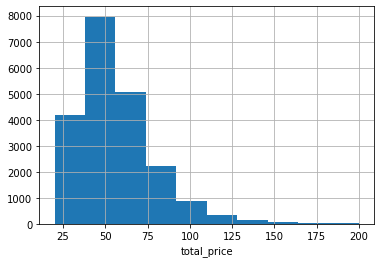

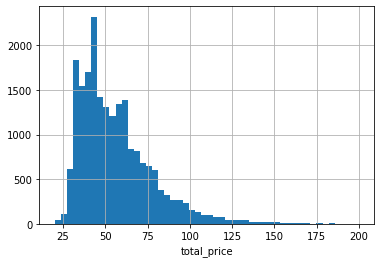

In [69]:
data['total_area'].hist().set_xlabel('total_price')
plt.show()
data['total_area'].hist(bins=50).set_xlabel('total_price')
plt.show()

На гистограммах видно, что больше всего квартир с площадью около 45-50 кв.м. Квартир с площадью, не превышающей 30 кв.м. значительно меньше. Это может быть связано с тем, что площадь типовых однокомнатных квартир - 30-40 кв.м.. Еще один пик виден при площади около 60 кв.м.. Это может быть связано с тем, что это как раз площадь современных двухкомнатных квартир. Квартир с площадью больше 80-90 кв.м. также заметно меньше. Здесь причиной может быть то, что это верхний порог площади трехкомнатных квартир, а самые популярные варианты - это как раз квартиры от 1 до 3 комнат.

**Жилая площадь квартиры**

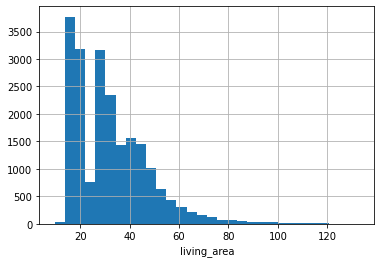

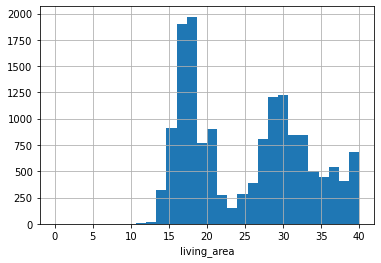

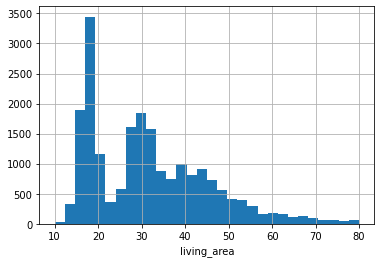

In [70]:
data['living_area'].hist(bins=30).set_xlabel('living_area')
plt.show()
data['living_area'].hist(bins=30, range=(0, 40)).set_xlabel('living_area')
plt.show()
data['living_area'].hist(bins=30, range=(10, 80)).set_xlabel('living_area')
plt.show()

На гистограммах видно, что есть 2 пика: самый высокий на значении около 18 кв.м. и чуть ниже на значении около 30 кв.м.. Также можно увидить провал на значениях около 23 кв.м.. Все это можно объяснить тем, что значения 18 кв.м. и 30 кв.м. - это, скорее всего, доли от стандартных общих площадей однокомнатных и двухкомнатных квартир. Квартир с жилой площадью, не превышающей 50 кв.м. значительно меньше. Здесь причиной может быть то, что это доля от стандарстной общей площади трехкомнатных квартир, а самые популярные варианты - это как раз квартиры от 1 до 3 комнат.

**Площадь кухни**

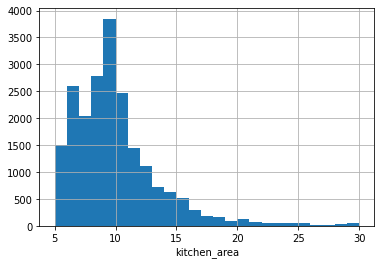

In [71]:
data['kitchen_area'].hist(bins=25).set_xlabel('kitchen_area')
plt.show()

На гистограмме видно, что больше всего кухонь площадью 9 кв.м. Чуть меньше - 6, 8 и 10 кв.м. Кухонь площадью 7 кв.м. мало в сравнение с соседними значениями, так как это не самый стандартный размер. С увеличением площади мы наблюдаем уменьшение колечества таких квартир, что вполне ожидаемо, так как больших квартир в общем меньше, а не стандартных размеров кухни встречаются еще реже. 

**Цена объекта**

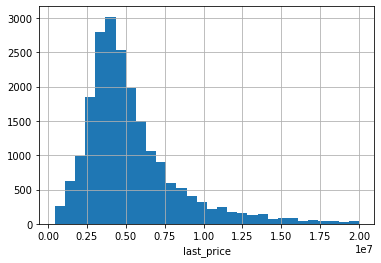

In [72]:
data['last_price'].hist(bins=30).set_xlabel('last_price')
plt.show()

На гистограмме видно, что больше всего на рынке квартир c ценой около 4 млн.. Квартир дешевле 2 млн. и дороже 7.5 млн. значительно меньше. В общем распределение цен похоже на нормальное с длинным "хвостом" в сторону очень дорогих квартир.

**Количество комнат**

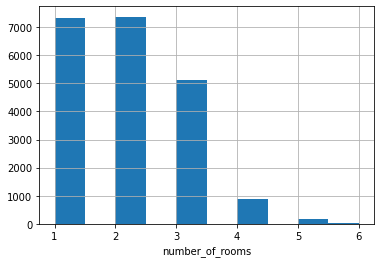

In [73]:
data['rooms'].hist().set_xlabel('number_of_rooms')
plt.show()

На гистограмме видно, что больше всего на рынке однокомнатных и двухкомнатных квартир. Чуть меньше количество трехкомнатных. Четырех-, пяти- и шестикомнатных квартир значительно меньше. Такой график отражает то, что самыми популярными вариантами жилья являются квартиры с количеством комнат от 1 до 3.

**Высота потолков**

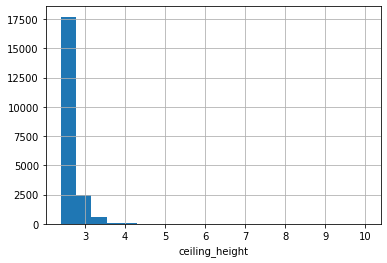

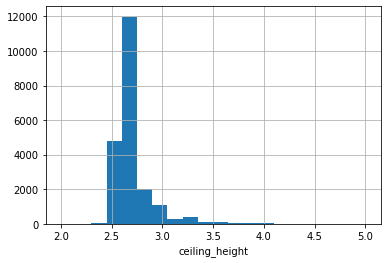

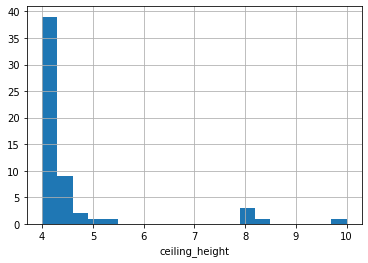

In [74]:
data['ceiling_height'].hist(bins=20).set_xlabel('ceiling_height')
plt.show()
data['ceiling_height'].hist(range=(2, 5), bins=20).set_xlabel('ceiling_height')
plt.show()
data['ceiling_height'].hist(range=(4, 10), bins=20).set_xlabel('ceiling_height')
plt.show()

На гистограммах видно, что больше всего на рынке квартир с высотой потолков от 2.5 до 3 м.. Самые часто встречающиеся высоты - 2.6-2.7 м.. Квартир с высотой потолков выше 4 метров совсем мало, однако такие квартиры существуют, поэтому данные значение не были удалены из выборки.

**Этаж квартиры**

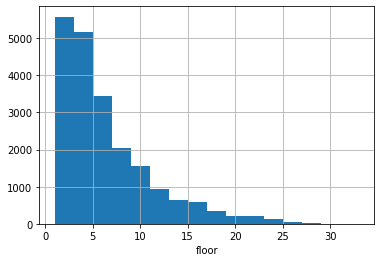

In [75]:
data['floor'].hist(bins=16).set_xlabel('floor')
plt.show()

На гистограмме видно, что больше всего на рынке квартир находящихся на 1-4 этажах. Чуть меньше квартир на 5-6 этажах. Это может быть связанно с тем, что в Санкт-Петербурге в основном преобладает невысотная застройка для сохранения исторического вида города. Начиная с 7 этажа количество квартир в каждой "корзине" равномерно уменьшается, а квартир расположенных выше 16 этажа уже совсем мало.  

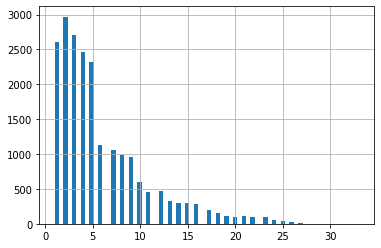

In [76]:
# check
data['floor'].hist(bins=70)
plt.show()

**Тип этажа квартиры**

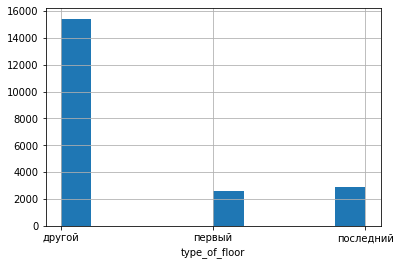

In [77]:
data['type_of_floor'].hist().set_xlabel('type_of_floor')
plt.show()

На гистограмме видно, что квартир, находящихся на первом или на последнем этаже, на рынке примерно одинаково не много. Это может быть связанно с тем, что квартиры на первом и последнем этажах в принципе являются менее популярными вариантами жилья из-за большого количества минусов. Например, холод в сезон отсутствия отопления на 1 этаже или частые протечки с крыши на последнем.  

**Общее количество этажей в доме**

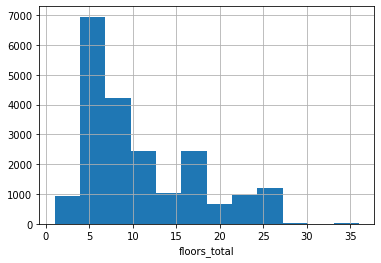

In [78]:
data['floors_total'].hist(bins=12).set_xlabel('floors_total')
plt.show()

На гистограмме видно, что больше всего жилых зданий высотой 4-6 этажей, что вполне ожидаемо для Санкт-Петербурга и пригородов. При этом зданий высотой 7-9 этажей тоже достаточно много, ведь девятиэтажки - это типичная советская застройка. Достаточное количество домов высотой 10-12 и 16-18 этажей, а высоток от 19 этажей уже значительно меньше.

**Расстояние до центра города в метрах**

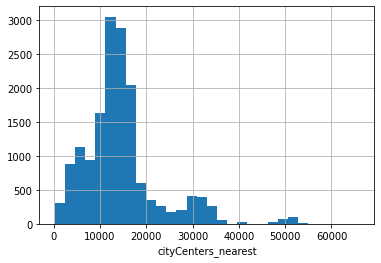

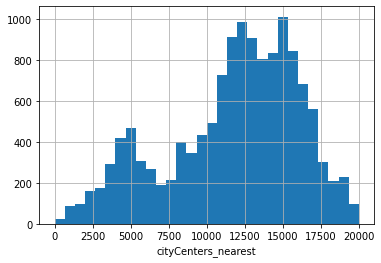

In [79]:
data['cityCenters_nearest'].hist(bins=30).set_xlabel('cityCenters_nearest')
plt.show()
data['cityCenters_nearest'].hist(range=(0, 20000), bins=30).set_xlabel('cityCenters_nearest')
plt.show()

На гистограммах видно, что больше всего квартир в районе от 10 до 20 км от центра города. Также есть всплеск на 4-5 км от центра. После 20 км от центра предложений гораздо меньше, что вполне ожидаемо, ведь жилья в городе больше, чем в пригородах.

**Расстояние до ближайшего аэропорта**

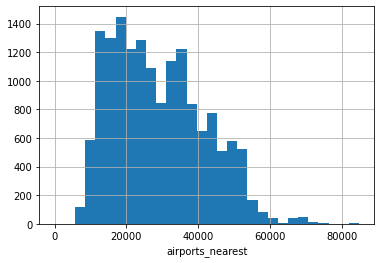

In [80]:
data['airports_nearest'].hist(bins=30).set_xlabel('airports_nearest')
plt.show()

На гистограммах видно, что больше всего квартир в районе от 15 до 25 км. от аэропорта. Также есть всплеск на 35 км. от аэропорта. После 50 км. от аэропорта предложений гораздо меньше, что вполне ожидаемо, ведь в Ленинградской области 1 крупный аэропорт, Пулково, и расстояние до него из дальних пригородов достаточно велико.

**Расстояние до ближайшего парка**

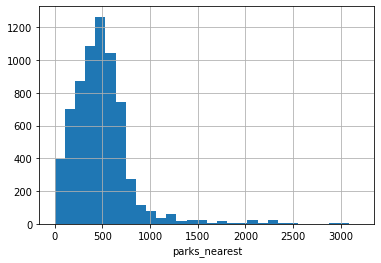

In [81]:
data['parks_nearest'].hist(bins=30).set_xlabel('parks_nearest')
plt.show()

На гистограммах видно, что больше всего квартир в районе 500 м. от парка. Поскольку в объявлениях ближайшими считаются парки в районе 3 км., то такое распределение вполне ожидаемое. Скорее всего, если расстояние больше, его просто реже указывают.

**День и месяц публикации объявления**

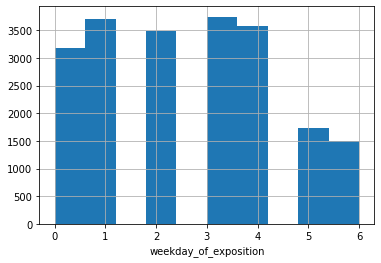

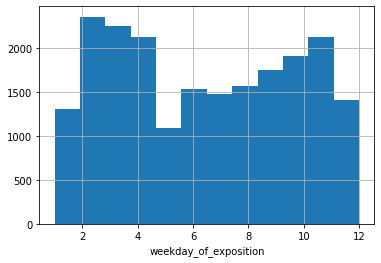

In [82]:
data['weekday_of_exposition'].hist().set_xlabel('weekday_of_exposition')
plt.show()
data['month_of_exposition'].hist(bins=12).set_xlabel('weekday_of_exposition')
plt.show()

На гистограммах видно, что объяления в будни публикуют чаще, чем в выходные. Самые популярные месяцы для публикации - с февраля по апрель, а реже всего объявления публикуют в мае.

### Исследование количества дней для продажи квартиры

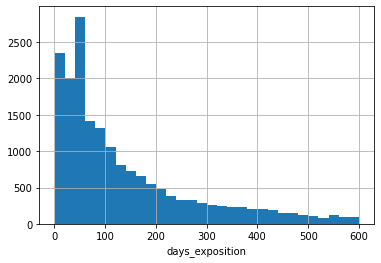

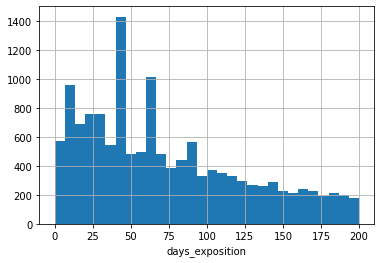

In [83]:
data['days_exposition'].hist(bins=30).set_xlabel('days_exposition')
plt.show()
data['days_exposition'].hist(range=(0, 200), bins=30).set_xlabel('days_exposition')
plt.show()

In [84]:
data['days_exposition'].describe()

count    18069.000000
mean       137.812386
std        136.007781
min          1.000000
25%         42.000000
50%         87.000000
75%        192.000000
max        600.000000
Name: days_exposition, dtype: float64

Медианное значение времени продажи квартиры равно 87 дней, а среднее 137. Такое сильное различие связанно с тем, что в выборке есть достаточно длинный "хвост" из высоких значений, начиная от 200, что примерно равно 3 квартилю. Поэтому можно сказать, что если объявление "висит" дольше 200 дней, то такую продажу можно назвать необычайно долгой. Очень быстрой же можно назвать продажу, если объявление "висело" меньше 50 дней, что примерно равно 1 квартелю.

**Сроки публикации объявлений, которые зависят от цены, следующие:**
* до 4,5 млн — 45 дней;
* от 4,5 до 10 млн — 60 дней;
* от 10 млн — 90 дней.

**Как раз на этих значениях видны пики на гистограмме.**

### Исследование факторов, влияющих на полную стоимость квартиры

**Общая площадь**

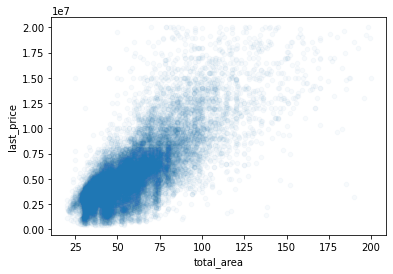

In [85]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03)
plt.show()

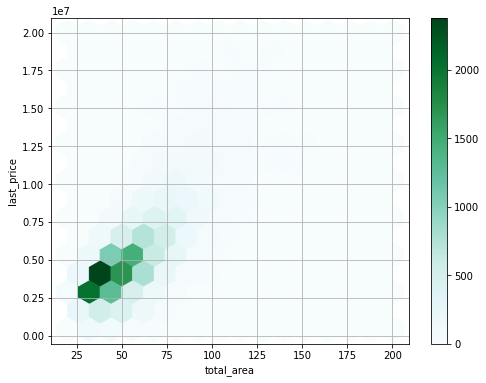

In [86]:
data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True)
plt.show()

In [87]:
data['last_price'].corr(data['total_area'])

0.7608646277381232

На диаграмме рассеяния видна общая тенденция к тому, что при увеличении общей площади квартиры растет ее цена. На графике с ячейками до 75 кв.м. также явно читается увеличение цены с увеличением площади. Области очень яркие, что говорит говорит о высокой частотности некоторых сочетаний. Квартир с площадью больше 75 кв.м. не так много, поэтому закономерность не так видна. Последним показателем, который подтвердит взаимосвязь является коэффициент корреляции Пирсона. В данном случае он равен 0.76. Это значение близко к 1, следовательно корреляция положительная и достаточно сильная, то есть с увеличением одной величины растет другая, что мы и наблюдали на графиках.

**Жилая площадь**

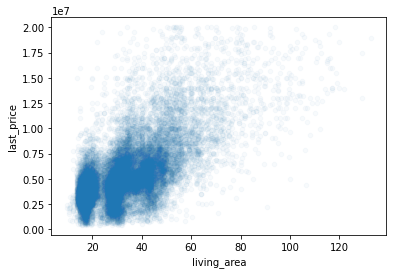

In [88]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.03)
plt.show()

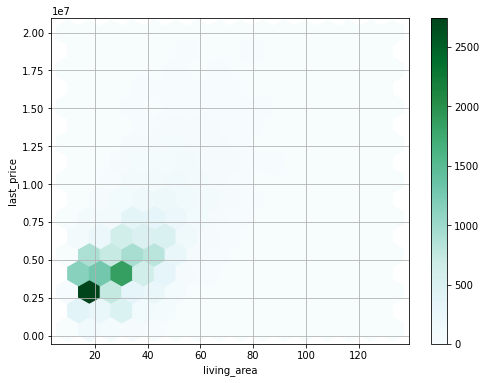

In [89]:
data.plot(x='living_area', y='last_price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True)
plt.show()

In [90]:
data['last_price'].corr(data['living_area'])

0.6590514066640126

На диаграмме рассеяния видна общая тенденция к тому, что при увеличении жилой площади квартиры растет ее цена. На графике с ячейками до 40 кв.м. также достаточно явно читается увеличение цены с увеличением площади. Области достаточно яркие, что говорит говорит о высокой частотности некоторых сочетаний. Квартир с площадью жилой площадью больше 40 кв.м. не так много, поэтому закономерность не так видна. Последним показателем, который подтвердит взаимосвязь является коэффициент корреляции Пирсона. В данном случае он равен 0.66. Это значение не так близко к 1, как в случае с общей площадью, поэтому корреляция не так видна на диаграмме рассеяния и графике с ячейками. Однако 0.66 - это достаточно высокое значение, следовательно корреляция положительная и средняя, то есть с увеличением одной величины растет другая, что мы и наблюдали на графиках.

**Площадь кухни**

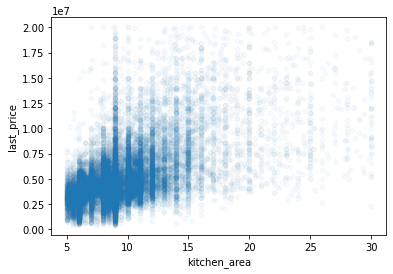

In [91]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03)
plt.show()

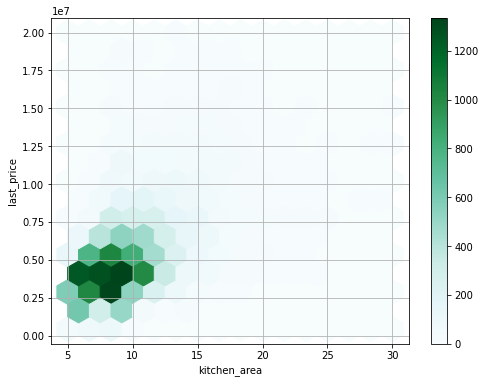

In [92]:
data.plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True)
plt.show()

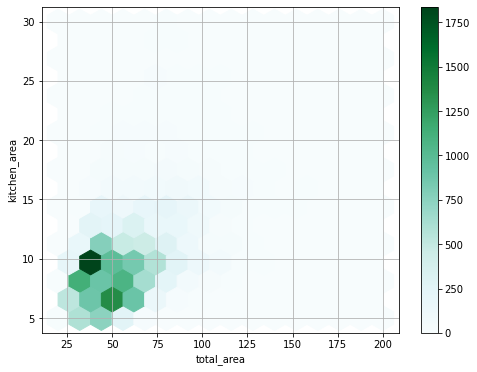

In [93]:
data.plot(x='total_area', y='kitchen_area', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True)
plt.show()

In [94]:
data['last_price'].corr(data['kitchen_area'])

0.5359594284239384

На диаграмме рассеяния не так ярко выделяется то, что при увеличении площади кухни растет полная стоимость квартиры, хотя в общем увеличение значений присутствует. На графике с ячейками видно, что в самых ярких областях находятся квартиры с кухнями от 5 до 10 кв.м. и примерно одиковой ценой (от 2.5 до 5 млн.), то есть большинство значений находятся в одном квадрате. Это можно объяснить тем, что площадь кухни - это в принципе достаточно стандартное значение. Когда увеличивается общая площадь квартиры, совсем не обязательно увеличивается площадь кухни. 

Последним показателем, который подтвердит или опровергнет наличие взаимосвязи между площадью кухни и стоимостью квартиры является коэффициент корреляции Пирсона. В данном случае он равен 0.54. Это значение не так близко к 1, как в случае с общей площадью или даже жилой площадью. Такое значение говорит о том, что корреляция положительная и средняя, но скорее ближе к слабой. Поэтому нельзя однозначно утвержать, что увеличение площади кухни влияет на рост стоимости квартиры.  

**Количество комнат**

,last_price
rooms,
1,3600000.0
2,4700000.0
3,5999000.0
4,7810000.0
5,10995000.0
6,12790000.0


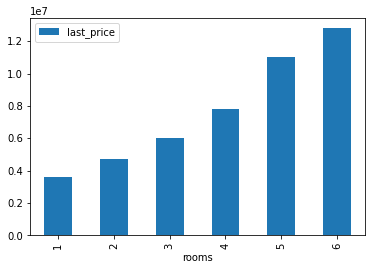

In [95]:
display(data.pivot_table(index='rooms', values='last_price', aggfunc='median'))
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(kind='bar')
plt.show()

На графике медианных значений стоимости квартиры в зависимости от количества комнат четко видно, что с увеличением количества комнат, растет общая стоимость квартиры.

**Типа этажа, на котором расположена квартира**

,last_price
type_of_floor,
другой,4750000.0
первый,3900000.0
последний,4200000.0


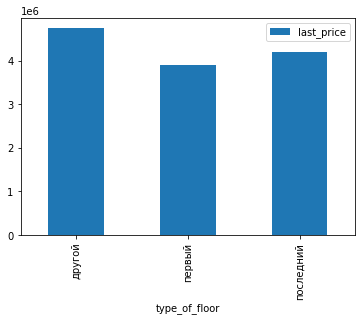

In [96]:
display(data.pivot_table(index='type_of_floor', values='last_price', aggfunc='median'))
data.pivot_table(index='type_of_floor', values='last_price', aggfunc='median').plot(kind='bar')
plt.show()

На графике медианных значений стоимости квартиры в зависимости от типа этажа видно, что самые дешевые квартиры на первом этаже, что вполне ожидаемо, так как первый этаж имеет больше всего минусов при проживании. Например, холод в сезон отсутствия отопления, больше шума (лучше слышно улицу и тех, кто заходит в подъезд), ниже уровень безопасности и т.п.. 

Следующий по уровню стоимости - последний этаж, так как он тоже имеет свои существенные минусы. Например, возможные протечки потолка с крыши, если нет технического этажа, постоянная потребность подниматься пешком при отсутствии лифта и т.п.. 

Самые дорогие квартиры на прочих этажах дома, так как они не имеют всех этих минусов и чаще выбираются людьми для жизни.

**Дата размещения (день недели, месяц, год)**

,last_price
weekday_of_exposition,
0,4590000.0
1,4650000.0
2,4600000.0
3,4500000.0
4,4500000.0
5,4500000.0
6,4500000.0


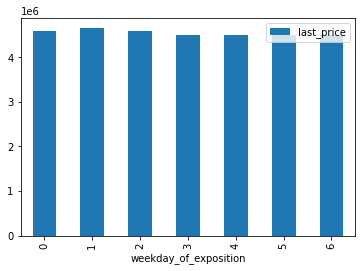

In [97]:
display(data.pivot_table(index='weekday_of_exposition', values='last_price', aggfunc='median'))
data.pivot_table(index='weekday_of_exposition', values='last_price', aggfunc='median').plot(kind='bar')
plt.show()

На графике медианных значений стоимости квартиры в зависимости от дня недели четко видно, что этот показатель не влияет на стоимость.

,last_price
month_of_exposition,
1,4500000.0
2,4590000.0
3,4578000.0
4,4700000.0
5,4450000.0
6,4300000.0
7,4550000.0
8,4500000.0
9,4600000.0


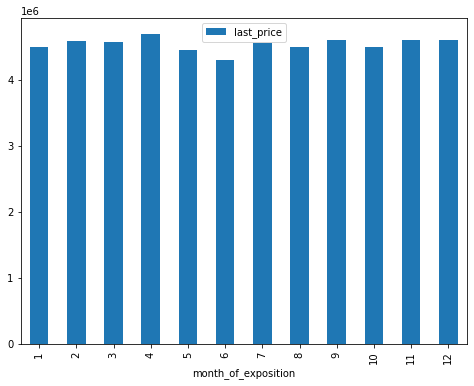

In [98]:
display(data.pivot_table(index='month_of_exposition', values='last_price', aggfunc='median'))
data.pivot_table(index='month_of_exposition', values='last_price', aggfunc='median').plot(kind='bar', figsize=(8,6))
plt.show()

На графике медианных значений стоимости квартиры в зависимости от месяца видно, что самые высокие цены на недвижимость весной (особенно в апреле) и осенью, а также перед новогодними праздниками. Спад цен наблюдается в мае и июне в связи с праздниками и периодом отпусков.

,last_price
year_of_exposition,
2014,7476560.0
2015,4925000.0
2016,4400000.0
2017,4450000.0
2018,4550000.0
2019,5000000.0


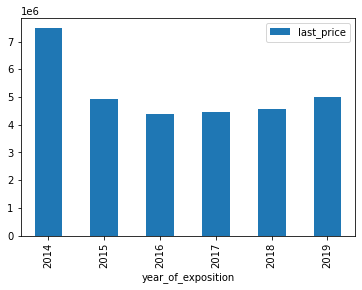

In [99]:
display(data.pivot_table(index='year_of_exposition', values='last_price', aggfunc='median'))
data.pivot_table(index='year_of_exposition', values='last_price', aggfunc='median').plot(kind='bar')
plt.show()

На графике медианных значений стоимости квартиры в зависимости от года виден "взлет" цен на недвижимость в 2014, однако не стоит ориентироваться на 2014 год, т.к. кол-во объявлений было небольшим, а стоимость объявлений высокой, может быть это были маркетинговые объявления в начале работы сервиса. Затем в основном цены находились в одном диапазоне. После 2016 читается увеличение, но не слишком явное.

### Анализ десяти населённых пунктов с наибольшим числом объявлений, анализ стоимости квадратного метра

In [100]:
locality_top_10 = \
(data.pivot_table(index='locality_name', values='price_for_square_meter', aggfunc=['count','median'])
    .round(decimals=2)
    .sort_values(by=('count','price_for_square_meter'), ascending=False)
    .head(10)
)

,count,median
,price_for_square_meter,price_for_square_meter
locality_name,,
Санкт-Петербург,13685,103125.00
поселок Мурино,485,84239.13
поселок Шушары,408,76037.18
Всеволожск,361,65540.54
Пушкин,331,99431.82
Колпино,327,74468.09
поселок Парголово,293,90809.63
Гатчина,283,67924.53


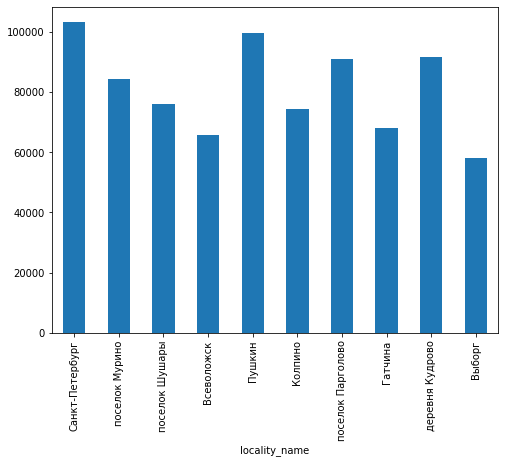

In [101]:
display(locality_top_10)
locality_top_10.plot(kind='bar', y=('median','price_for_square_meter'), figsize=(8,6), legend=False)
plt.show()

**Из данной таблицы можно сделать следующие выводы:**
* Самое большое количество объявлений в Санкт-Петербурге, что ожидаемо, ведь это город-миллионник и центр области.
* Десятое место по количеству объявлений занимает Выборг.
* Самая высокая цена за квадратный метр также в Петербурге.
* Самая низкая цена за квадратный метр в Выборге.

### Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра

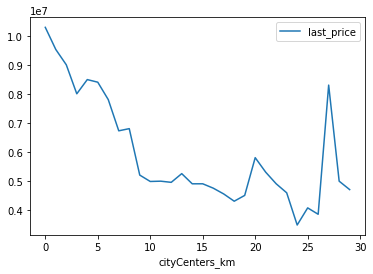

In [102]:
data.query('locality_name == "Санкт-Петербург"')\
    .pivot_table(index='cityCenters_km', values='last_price', aggfunc='median')\
    .plot()
plt.show()

In [103]:
data.query('locality_name == "Санкт-Петербург" and cityCenters_km == 27').sort_values(by='last_price', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter,weekday_of_exposition,month_of_exposition,year_of_exposition,type_of_floor,cityCenters_km
636,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0,NaN,128.0,193918.918919,1,11,2017,другой,27
5267,6,2250000.0,32.0,2018-02-27,1,2.64,2,16.5,2,False,...,NaN,0,NaN,178.0,70312.500000,1,2,2018,последний,27


В целом можно сказать, что чем больше расстояние до центра города, тем ниже цена на недвижимость. Однако есть отдельные "всплески" цены на определенных километрах. Они могут быть связаны с популярностью тех или иных районов по разным причинам: 
* 5-6 километров от центра - это все еще историческая застройка, но в этом районе уже нет таких толп туристов. 
* На 8-9 километров от центра, скорее всего, находятся жилые комплексы и спальные районы, где продается много квартир.
* Высокий "всплеск" на 27 км., однако на этом километре всего 2 предложение, одно из которых с очень высокой стоимостью. Поэтому такое большое медианное значение - это скорее вырос.

## Общий вывод

**Из всего анализа в целом можно сделать следующие выводы:**
* Больше всего на рынке квартир с общей площадью 45-50 кв.м., ценой 3-5 млн. и 1-3 комнатами.
* Большинство квартир находятся на 1-4 этажах и чуть меньше на 5-6. Это, скорее всего, связанно с тем, что в Петербурге и пригородах мало высотных зданий. Большинство домов имеют 4-6 этажей. Кроме того, можно отметить, что на рынке мало предложений на первом и последнем этажах.
* В среднем квартиры продаются за 3-4 месяца.
* Больше всего на цену влияют общая площадь квартиры и количество комнат.
* С точки зрения локации, 65% предложений находятся в самом Санкт-Петербурге, а в первую 10 по количеству квартир входят его самые ближайшие пригороды. 
* Самая высокая средняя цена за квадратный метр в самом Санкт-Петербург. Внутри города он падает по мере удаленности от центра.